In [1]:
# Import standard libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv("data/FIFA_Clean.csv", parse_dates=["birth_date"], index_col="id")
X = df.select_dtypes(exclude=["object", "datetime64[ns]"])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17954 entries, 158023 to 247187
Data columns (total 80 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   body_lean                      17954 non-null  int64  
 1   body_normal                    17954 non-null  int64  
 2   body_other                     17954 non-null  int64  
 3   body_stocky                    17954 non-null  int64  
 4   foot_Right                     17954 non-null  int64  
 5   work_rate_atk                  17954 non-null  int64  
 6   work_rate_def                  17954 non-null  int64  
 7   GK_diving                      17954 non-null  int64  
 8   GK_handling                    17954 non-null  int64  
 9   GK_kicking                     17954 non-null  int64  
 10  GK_positioning                 17954 non-null  int64  
 11  GK_reflexes                    17954 non-null  int64  
 12  acceleration                   17954 non

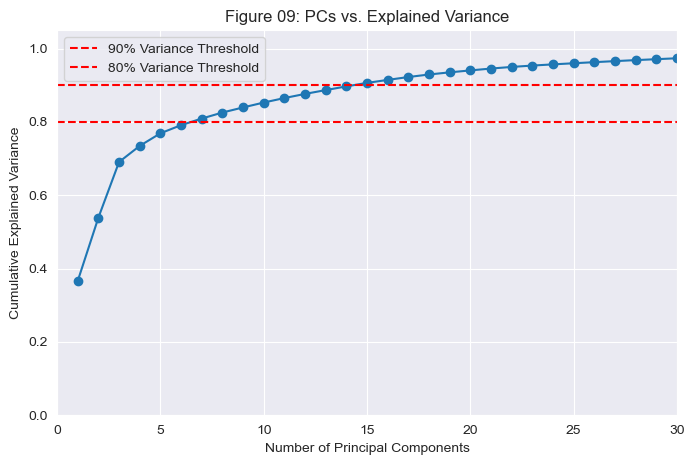

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Step 1: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit PCA
pca = PCA()
pca.fit(X_scaled)

# Step 3: Compute cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 4: Plot n_components vs cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Figure 09: PCs vs. Explained Variance')
plt.grid(True)

plt.xlim(0, 30)
plt.ylim(0, 1.05)
plt.axhline(y=0.90, color='red', linestyle='--', label='90% Variance Threshold')
plt.axhline(y=0.80, color='red', linestyle='--', label='80% Variance Threshold')

plt.legend()
plt.show()

In [36]:
cumulative_variance[6]

0.8093374155461786

In [87]:
# PCA Fit
pca = PCA(n_components=7, random_state=2025).fit_transform(X_scaled)
pca_df = pd.DataFrame(data=pca, columns=[f"PC{n}" for n in range(1, 8)], dtype="float64")

df2 = pd.concat(objs=[X, pca_df], axis=1)

# PC Characteristics?
corr = df2.corr()
for pc in pca_df.columns.tolist():
    idx = corr[pc].abs().reset_index().sort_values(by=pc, ascending=False).iloc[1:6, 0].tolist()
    cor = corr[pc].loc[idx].round(2).tolist()
    temp_dict = dict(zip(idx, cor))
    print(f"{pc}: {temp_dict}")

PC1: {'weight_kgs': -0.4, 'value_euro': 0.37, 'release_clause_euro': 0.34, 'strength': -0.34, 'jumping': -0.29}
PC2: {'reactions': -0.34, 'wage_euro': -0.32, 'body_normal': -0.3, 'dribbling': -0.3, 'composure': -0.29}
PC3: {'work_rate_def': 0.38, 'sliding_tackle': 0.37, 'interceptions': 0.33, 'marking': 0.32, 'standing_tackle': 0.31}
PC4: {'weak_foot(1-5)': 0.46, 'weight_kgs': -0.39, 'acceleration': 0.37, 'agility': 0.36, 'balance': 0.31}
PC5: {'weight_kgs': -0.44, 'RDM': 0.33, 'LDM': 0.33, 'CDM': 0.33, 'interceptions': 0.31}
PC6: {'body_stocky': 0.4, 'body_normal': -0.34, 'international_reputation(1-5)': -0.31, 'aggression': 0.24, 'strength': -0.22}
PC7: {'LS': -0.5, 'ST': -0.5, 'RS': -0.5, 'RF': -0.46, 'CF': -0.46}
